### Trabalho Final da Matéria de Processamento de Imagens - BCC FURB

<b>Turma:</b> SUP-CMP.187.0.2-2024/1<br>
<b>Docente:</b> Aurélio Faustino Hoppe<br>
<b>Discentes:</b> Arthur B Pinotti, Kaue Reblin, Luiz G Klitzke<br>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Parâmetros

img_height, img_width = 256, 256
path_dataset = "Images"
labels_classes = ["Habitado", "NaoHabitado"]

In [51]:
#Obtem os datasets de treino e validação através da estrutura de pastas

train_dataset, validation_dataset  = keras.utils.image_dataset_from_directory(
    path_dataset,
    labels = "inferred",
    label_mode = "int",
    class_names = labels_classes,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (img_height, img_width),
    shuffle = True,
    validation_split = 0.2, #Usa n% de dados para validação
    subset = "both",
    verbose =  True,
    seed = 1024,
)

Found 486 files belonging to 2 classes.
Using 389 files for training.
Using 97 files for validation.


In [56]:
cnn = keras.models.Sequential()

cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(keras.layers.BatchNormalization())

# Segunda camada convolucional
cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(keras.layers.BatchNormalization())

# Terceira camada convolucional
cnn.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(keras.layers.BatchNormalization())

# Camada de flatten para converter os mapas de características 2D em um vetor 1D
cnn.add(keras.layers.Flatten())

# Camada totalmente conectada
cnn.add(keras.layers.Dense(512, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))

# Camada de saída para classificação binária
cnn.add(keras.layers.Dense(1, activation='sigmoid'))

cnn.summary()

AttributeError: module 'keras.api.models' has no attribute 'Conv2D'

In [55]:
# Compilação do modelo
cnn.compile(
    loss='binary_crossentropy', #https://keras.io/api/losses/probabilistic_losses/#sparse_categorical_crossentropy-function
    optimizer='adam', #https://keras.io/api/optimizers/sgd/
    metrics=['accuracy']
)

# Treinamento do modelo
history_cnn = cnn.fit(
    train_dataset,
    epochs = 20,
    validation_data = validation_dataset,
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7006 - loss: 0.6704 - val_accuracy: 0.6495 - val_loss: 0.6756
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7079 - loss: 0.6676 - val_accuracy: 0.6495 - val_loss: 0.6744
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7014 - loss: 0.6666 - val_accuracy: 0.6495 - val_loss: 0.6732
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7103 - loss: 0.6635 - val_accuracy: 0.6495 - val_loss: 0.6720
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7308 - loss: 0.6584 - val_accuracy: 0.6495 - val_loss: 0.6710
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6986 - loss: 0.6621 - val_accuracy: 0.6495 - val_loss: 0.6699
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6863 - loss: 0.6627 - val_accuracy: 0.6495 - val_loss: 0.6687
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6891 - loss: 0.6606 - val_accuracy: 0.6495 - val_loss:

KeyboardInterrupt: 

In [43]:
# Avaliação do modelo
loss, accuracy = cnn.evaluate(validation_dataset, verbose = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6285 - loss: 0.6031


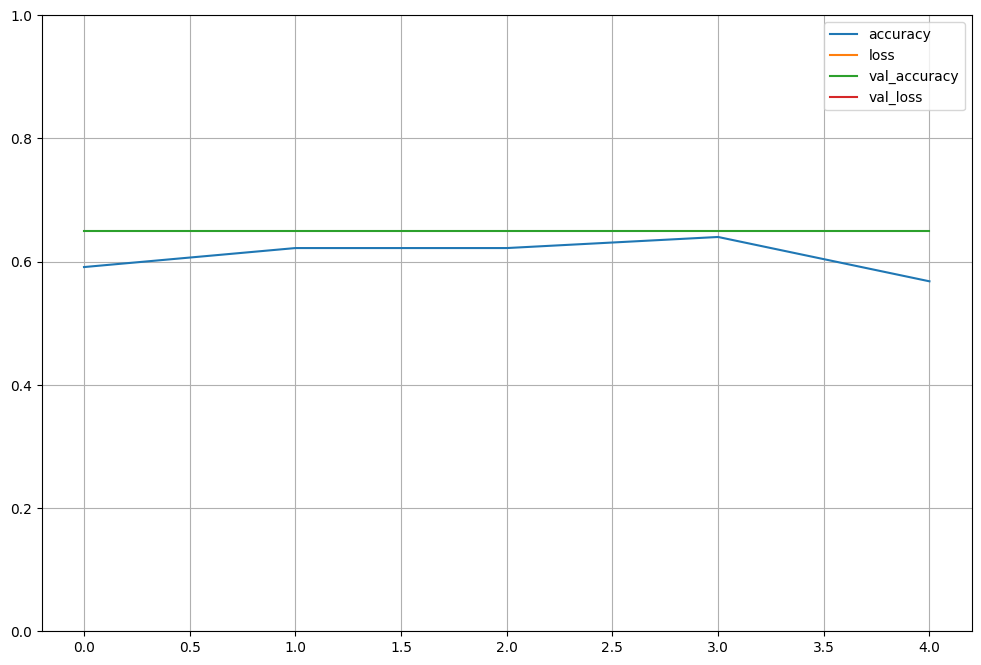

In [29]:
#Apresenta os dados da performânce do algoritmo, atráves do membro history, preenchido com a execução.
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()